In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
np.random.seed(42)
pd.core.common.is_list_like=pd.api.types.is_list_like
import pandas_datareader.data as web


In [2]:
import pandas_datareader
import pandas_datareader.data as NET
from datetime import datetime

In [3]:
df=pd.read_csv('tycr.csv')
df

,Date,oneMo,2Mo,3Mo,sixMo,oneYr,2Yr,3Yr,fiveYr,7Yr,tenYr,20Yr,thtYr
0,8/19/2021,0.04,0.05,0.06,0.05,0.06,0.22,0.44,0.78,1.04,1.24,1.80,1.88
1,8/18/2021,0.03,0.05,0.07,0.05,0.07,0.23,0.43,0.79,1.06,1.27,1.84,1.91
2,8/17/2021,0.03,0.05,0.07,0.06,0.07,0.23,0.43,0.77,1.05,1.26,1.82,1.92
3,8/16/2021,0.04,0.05,0.06,0.05,0.08,0.21,0.42,0.75,1.04,1.26,1.82,1.92
4,8/13/2021,0.04,0.05,0.06,0.05,0.08,0.23,0.44,0.79,1.08,1.29,1.85,1.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,1/8/2019,2.40,2.42,2.46,2.54,2.60,2.58,2.57,2.58,2.63,2.73,2.88,3.00
657,1/7/2019,2.42,2.42,2.45,2.54,2.58,2.53,2.51,2.53,2.60,2.70,2.86,2.99
658,1/4/2019,2.40,2.42,2.42,2.51,2.57,2.50,2.47,2.49,2.56,2.67,2.83,2.98
659,1/3/2019,2.42,2.42,2.41,2.47,2.50,2.39,2.35,2.37,2.44,2.56,2.75,2.92


In [4]:
df.describe()

,oneMo,2Mo,3Mo,sixMo,oneYr,2Yr,3Yr,fiveYr,7Yr,tenYr,20Yr,thtYr
count,661.000000,661.000000,661.000000,661.000000,661.00000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,0.942995,0.945825,0.943268,0.951664,0.93407,0.932753,0.971377,1.119818,1.319713,1.493752,1.906868,2.080424
std,1.003646,1.000081,0.993748,0.990654,0.96015,0.894882,0.839724,0.747101,0.683732,0.646184,0.557677,0.536969
min,0.000000,0.000000,0.000000,0.020000,0.04000,0.090000,0.100000,0.190000,0.360000,0.520000,0.870000,0.990000
25%,0.070000,0.080000,0.080000,0.090000,0.10000,0.160000,0.220000,0.390000,0.640000,0.870000,1.390000,1.610000
50%,0.120000,0.140000,0.150000,0.170000,0.17000,0.230000,0.420000,0.850000,1.280000,1.550000,1.960000,2.110000
75%,2.050000,2.010000,1.970000,1.910000,1.78000,1.650000,1.650000,1.680000,1.780000,1.870000,2.250000,2.370000
max,2.510000,2.480000,2.490000,2.540000,2.60000,2.620000,2.600000,2.620000,2.700000,2.790000,2.970000,3.130000


In [5]:
df6 = df.set_index('Date')

In [6]:
df6=df6.drop(columns=["2Mo","3Mo","2Yr","3Yr","7Yr","20Yr"])

In [7]:
##defining data frames for prices before and prices after covid
pb4covid=df6.iloc[396:661]

pb4covid

,oneMo,sixMo,oneYr,fiveYr,tenYr,thtYr
Date,,,,,,
1/23/2020,1.55,1.56,1.55,1.55,1.74,2.18
1/22/2020,1.52,1.56,1.55,1.57,1.77,2.22
1/21/2020,1.52,1.57,1.54,1.57,1.78,2.23
1/17/2020,1.54,1.57,1.56,1.63,1.84,2.29
1/16/2020,1.54,1.56,1.54,1.63,1.81,2.26
...,...,...,...,...,...,...
1/8/2019,2.40,2.54,2.60,2.58,2.73,3.00
1/7/2019,2.42,2.54,2.58,2.53,2.70,2.99
1/4/2019,2.40,2.51,2.57,2.49,2.67,2.98


In [8]:
pb4covid.describe()

,oneMo,sixMo,oneYr,fiveYr,tenYr,thtYr
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,2.084038,2.078415,2.023208,1.934038,2.123094,2.563283
std,0.343204,0.369022,0.392943,0.386836,0.397808,0.354760
min,1.480000,1.550000,1.510000,1.320000,1.470000,1.940000
25%,1.740000,1.650000,1.600000,1.620000,1.790000,2.260000
50%,2.140000,2.080000,1.950000,1.800000,2.050000,2.550000
75%,2.420000,2.460000,2.430000,2.320000,2.530000,2.930000
max,2.510000,2.540000,2.600000,2.620000,2.790000,3.130000


In [9]:
paftcovid=df6.iloc[1:396]

In [10]:
paftcovid.describe()

,oneMo,sixMo,oneYr,fiveYr,tenYr,thtYr
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.179772,0.198025,0.205595,0.574430,1.072177,1.756987
std,0.382997,0.356853,0.330184,0.300551,0.385599,0.369967
min,0.000000,0.020000,0.040000,0.190000,0.520000,0.990000
25%,0.040000,0.060000,0.080000,0.340000,0.700000,1.430000
50%,0.080000,0.100000,0.120000,0.450000,0.940000,1.670000
75%,0.100000,0.140000,0.160000,0.800000,1.485000,2.075000
max,1.610000,1.580000,1.550000,1.510000,1.740000,2.450000


In [11]:
#returns calculation
oneMoRETURNS= df['oneMo'].pct_change(1)
sixMoRETURNS = df['sixMo'].pct_change(1)
oneYrRETURNS = df['oneYr'].pct_change(1)
fiveYrRETURNS = df['fiveYr'].pct_change(1)
tenYrRETURNS= df['tenYr'].pct_change(1)
thtYrRETURNS = df['thtYr'].pct_change(1)


In [12]:
## QQ PLOTS 
import statsmodels.api as sm
import pylab as py

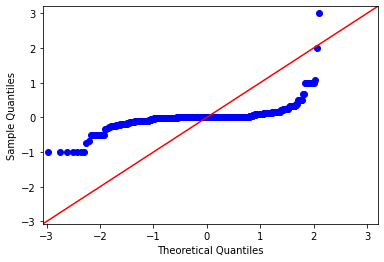

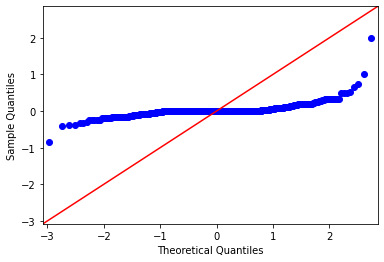

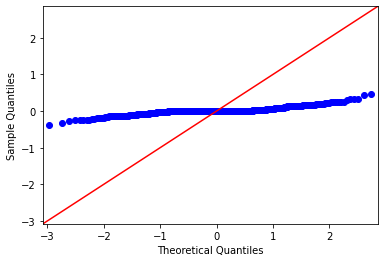

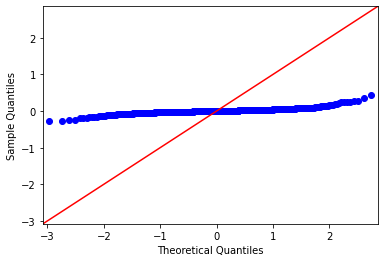

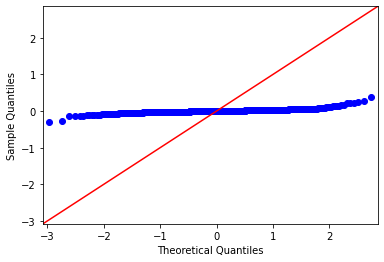

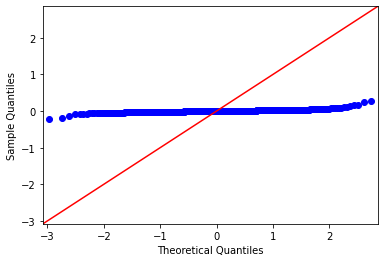

In [13]:
sm.qqplot(oneMoRETURNS, line ='45')
py.show()
sm.qqplot(sixMoRETURNS, line ='45')
py.show()
sm.qqplot(oneYrRETURNS, line ='45')
py.show()
sm.qqplot(fiveYrRETURNS, line ='45')
py.show()
sm.qqplot(tenYrRETURNS, line ='45')
py.show()
sm.qqplot(thtYrRETURNS, line ='45')
py.show()


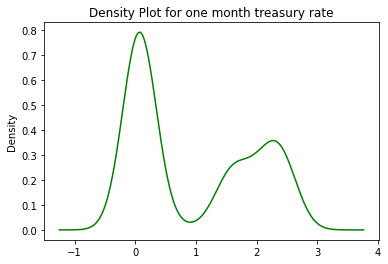

In [14]:

df.oneMo.plot.density(color='green')
plt.title('Density Plot for one month treasury rate')
plt.show()
 


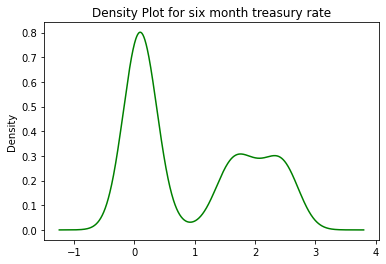

In [15]:
df.sixMo.plot.density(color='green')
plt.title('Density Plot for six month treasury rate')
plt.show()
 

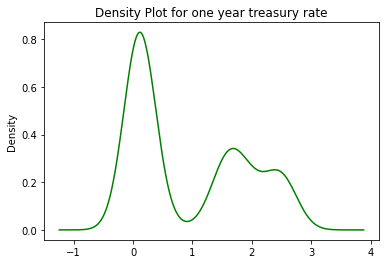

In [16]:
df.oneYr.plot.density(color='green')
plt.title('Density Plot for one year treasury rate')
plt.show()

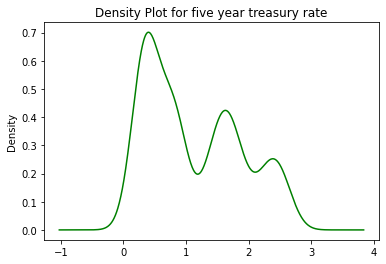

In [17]:
df.fiveYr.plot.density(color='green')
plt.title('Density Plot for five year treasury rate')
plt.show()

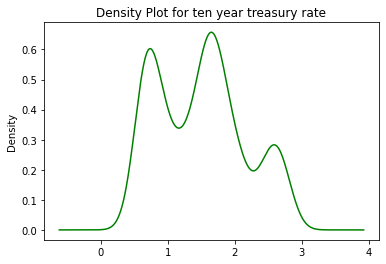

In [18]:
df.tenYr.plot.density(color='green')
plt.title('Density Plot for ten year treasury rate')
plt.show()

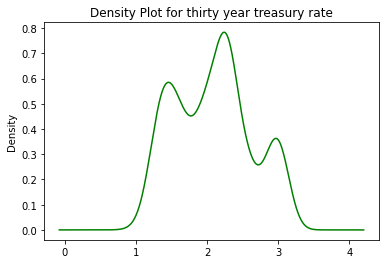

In [19]:
df.thtYr.plot.density(color='green')
plt.title('Density Plot for thirty year treasury rate')
plt.show()

C:\Users\Gibson\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


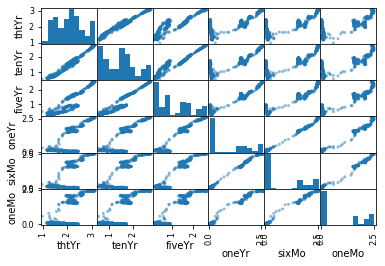

In [20]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix   
  
# selecting numerical features
features = ['thtYr', 'tenYr',
            'fiveYr','oneYr','sixMo','oneMo']
   
# plotting the scatter matrix
# with the features
scatter_matrix(df[features])
plt.show()

In [21]:
import os
import pickle
from functools import reduce
from operator import mul

import pandas as pd
import numpy as np

from statsmodels.regression.linear_model import OLS
from sklearn import linear_model
from sklearn.decomposition import PCA

import holoviews as hv
import hvplot
import hvplot.pandas

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#Construct the Correlation Matrix
corr_matrix = df.corr(method='pearson')
corr_matrix = np.abs(corr_matrix) * 100

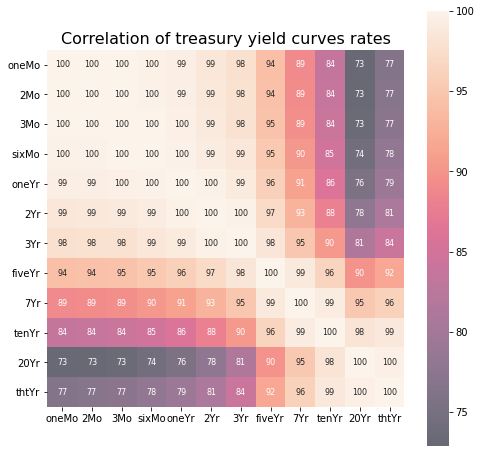

In [23]:
#Plot a Correlation Matrix Heat Map
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix , cbar=True, annot=True, square=True,
            fmt='.0f', annot_kws={'size':8}, alpha=0.6)
plt.title('Correlation of treasury yield curves rates', fontsize=16)
plt.show()

In [24]:
## Testing for Stationarity of Return Series

In [25]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

oneMo= df['oneMo']
fiveYr= df['fiveYr']
thtYr= df['thtYr']

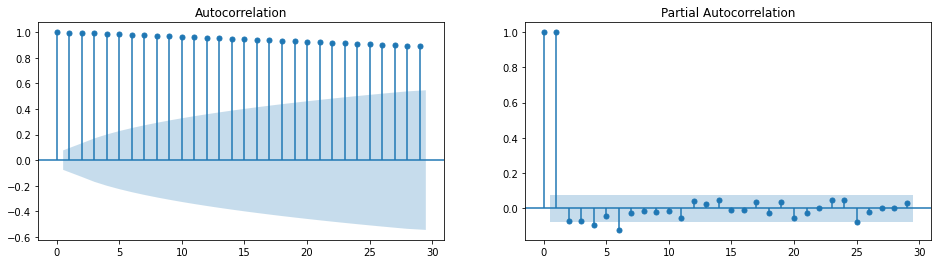

In [26]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
plot_acf(oneMo.dropna(), ax=ax[0])
plot_pacf(oneMo.dropna(), ax=ax[1])
plt.show()

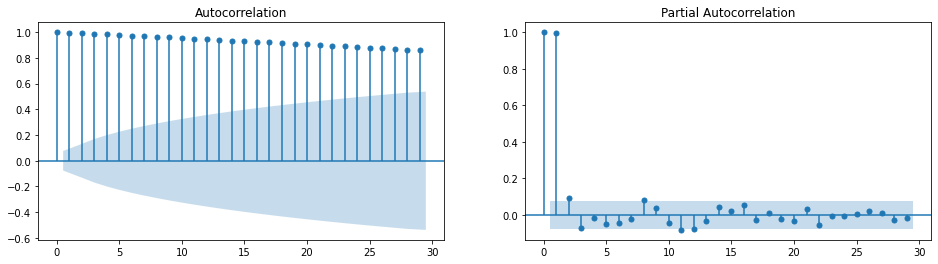

In [27]:


fig, ax = plt.subplots(1,2,figsize=(16,4))
plot_acf(fiveYr.dropna(), ax=ax[0])
plot_pacf(fiveYr.dropna(), ax=ax[1])
plt.show()

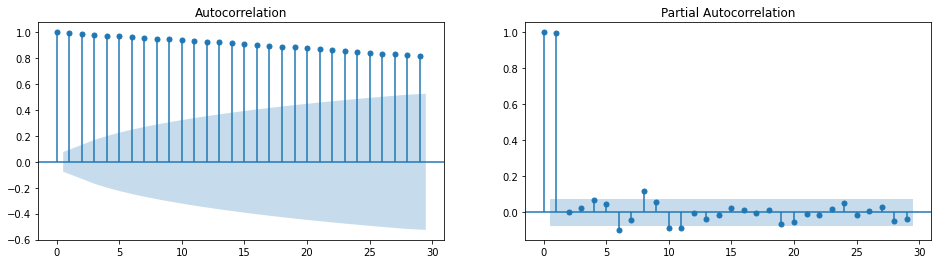

In [28]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
plot_acf(thtYr.dropna(), ax=ax[0])
plot_pacf(thtYr.dropna(), ax=ax[1])
plt.show()

In [29]:
#returns calculation
oneMoRETURNS= df['oneMo'].pct_change(1)
sixMoRETURNS = df['sixMo'].pct_change(1)
oneYrRETURNS = df['oneYr'].pct_change(1)
fiveYrRETURNS = df['fiveYr'].pct_change(1)
tenYrRETURNS= df['tenYr'].pct_change(1)
thtYrRETURNS = df['thtYr'].pct_change(1)


In [30]:
oneMoRETURNS_JB = sm.stats.stattools.jarque_bera(oneMoRETURNS.fillna(oneMoRETURNS.mean()).dropna())
fiveYrRETURNS_JB = sm.stats.stattools.jarque_bera(fiveYrRETURNS.fillna(fiveYrRETURNS.mean()).dropna())
thtYrRETURNS_JB = sm.stats.stattools.jarque_bera(thtYrRETURNS.fillna(thtYrRETURNS.mean()).dropna())


C:\Users\Gibson\anaconda3\lib\site-packages\scipy\stats\stats.py:1010: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)
C:\Users\Gibson\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Gibson\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Gibson\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [31]:
print('Jarque Bera results for treasury yield rates returns: \noneMoRETURNS  - ' + str(oneMoRETURNS_JB[0]) + '\nfiveYrRETURNS    - '+ str(fiveYrRETURNS_JB[0])+ '\nthtYr_RETURNS    - '+ str(thtYrRETURNS_JB[0]) )

Jarque Bera results for treasury yield rates returns: 
oneMoRETURNS  - nan
fiveYrRETURNS    - 2353.965942914194
thtYr_RETURNS    - 9709.902792703213
